In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2-zadanie-spotify/songs-reg.ipynb
/kaggle/input/2-zadanie-spotify/dataset.csv


****EDA и начало Feature Engineering****

* track_id: ID Spotify для каждого трека;
* artists: Имена исполнителей;
* album_name: Название альбома;
* track_name: Название трека; 
* popularity: Значение от 0 до 100,показывающую популярность трека;
* duration_ms: длина трека в миллисекундах;
* explicit: Значение 0 или 1, содержит ли трек откровенного контента;
* danceability: Насколько трек подходит для танцев 0 нетанцевальный, 1 танцевальный;
* energy: Представляет интенсивность и насыщенность трека 0 низкая энергия,1 высокая энергия;
* key: Музыкальная тональность трека, отображаемая с использованием стандартной нотной записи;
* loudness: Общая громкость трека в децибелах (дБ);
* mode: Указывает на модальность (мажорную или минорную) трека;
* speechiness: Определяет наличие произносимых слов в треке;
* acousticness: Показатель достоверности того, является ли трек акустическим 0 не является акустическим, 1 хорошо слышен;
* instrumentalness: Определяет, содержит ли трек вокал 0 содержит вокал, 1 инструментальный;
* liveness: Определяет присутствие аудитории при записи 0 студийная запись, 1 живое исполнение;
* valence: Измеряет музыкальную позитивность, передаваемую треком 0 негативная, 1 положительная;
* tempo: Предполагаемый темп трека в ударах в минуту (BPM);
* time_signature: Предполагаемый временной интервал трека от 3 до 7;

In [113]:
df = pd.read_csv('/kaggle/input/2-zadanie-spotify/dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [114]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [115]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Дропнем пропущенные значение

In [116]:
df = df.dropna()

Начнём преобразование датасета

In [117]:
def convert(ms):
    return round(ms/(1000*60), 1)
df['duration_ms'] = df['duration_ms'].apply(convert)

/tmp/ipykernel_24/2757315009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].apply(convert)


In [118]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [119]:
df = df.rename(columns={'duration_ms': 'Time'})
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,Time,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Переделаем значение Tempo, чтобы было проще отслеживать уровень этого показателя.# 

In [120]:
sum1 = df['tempo'].sum()
def convert2(value):
    global sum1
    return value/sum1
df['tempo'] = df['tempo'].apply(convert2)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,Time,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,world-music


Дропнем значени track_id , потому что оно никак не повлияет на статистику.
Дромнем значение Unnamed, так как оно полностью копирует номер строки и не несёт в себе полезной информации

In [121]:
df = df.drop('track_id', axis=1)
df

,Unnamed: 0,artists,album_name,track_name,popularity,Time,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,world-music
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,world-music
113997,113997,Cesária Evora,Best Of,Miss Perfumado,22,4.5,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,world-music
113998,113998,Michael W. Smith,Change Your World,Friends,41,4.7,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,world-music


In [122]:
df = df.drop('Unnamed: 0',axis=1)
df

,artists,album_name,track_name,popularity,Time,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,4.5,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,4.7,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,world-music


Унифицируем значения для artists,album_name,track_name,explicit,track_genre

In [123]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(df['artists'].unique())
df['artists'] = LE.transform(df['artists'])
LE.fit(df['album_name'].unique())
df['album_name'] = LE.transform(df['album_name'])
LE.fit(df['track_name'].unique())
df['track_name'] = LE.transform(df['track_name'])
LE.fit(df['explicit'].unique())
df['explicit'] = LE.transform(df['explicit'])
LE.fit(df['track_genre'].unique())
df['track_genre'] = LE.transform(df['track_genre'])
df

,artists,album_name,track_name,popularity,Time,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,0
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,0
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,0
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,113
113996,22486,66,65090,22,6.4,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,113
113997,4952,5028,38207,22,4.5,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,113
113998,18534,7238,21507,41,4.7,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,113


Посмотрим на кореляцию признаков.

In [124]:
corr1 = df.corr()
for column in corr1.columns:
    if corr1[f'{column}'].nlargest(2).iloc[1] > 0.6:
        print(column)

energy
loudness


Их оказалось только 2.Обьеденим эти 2 значения перемножив их. И назовём колонку energy2

In [125]:
df['energy2'] = df['energy'] * df['loudness']
df = df.drop(['loudness'], axis=1)
df = df.drop(['energy'], axis=1)
df

,artists,album_name,track_name,popularity,Time,explicit,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy2
0,10357,8100,11741,73,3.8,0,0.676,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,0,-3.109906
1,3287,14796,22528,55,2.5,0,0.420,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,0,-2.861010
2,12397,39162,60774,57,3.5,0,0.438,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,0,-3.494506
3,14839,8580,9580,71,3.4,0,0.266,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,0,-1.103494
4,5255,16899,25689,82,3.3,0,0.618,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,0,-4.288683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,113,-3.852355
113996,22486,66,65090,22,6.4,0,0.174,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,113,-2.143206
113997,4952,5028,38207,22,4.5,0,0.629,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,113,-3.584455
113998,18534,7238,21507,41,4.7,0,0.587,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,113,-5.509834


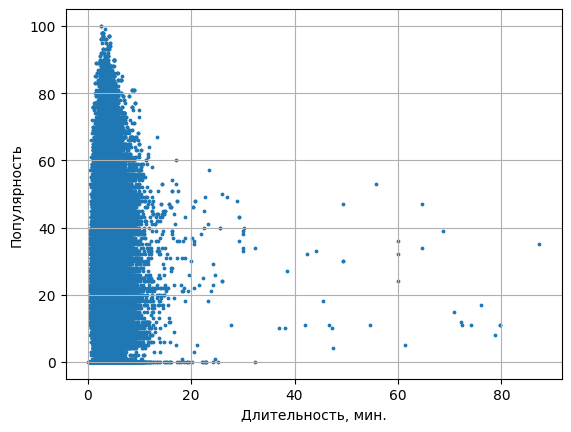

In [126]:
import matplotlib.pyplot as plt
plt.scatter(df['Time'], df['popularity'], s=3)
plt.xlabel('Длительность, мин.')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

Построим график популярности жанров

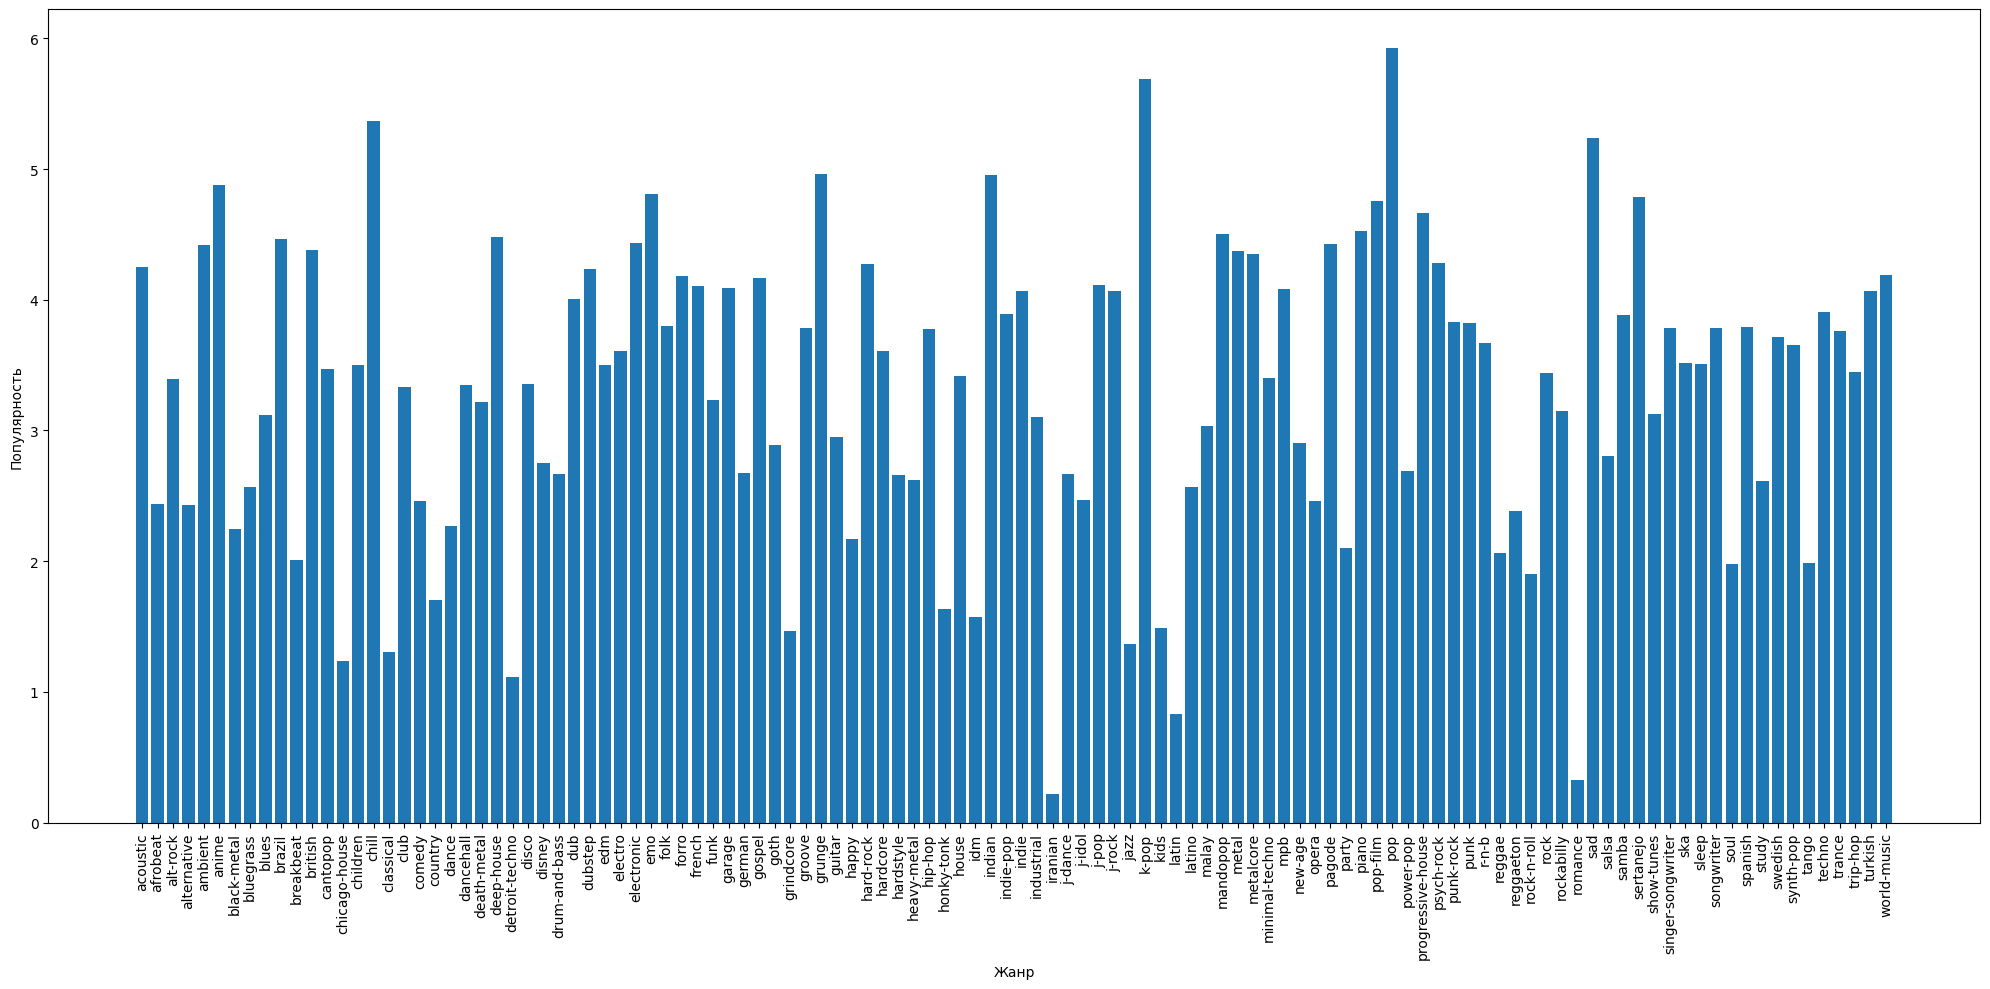

In [127]:
df1 = pd.read_csv('/kaggle/input/2-zadanie-spotify/dataset.csv')
popularitygenre = list(df1.groupby('track_genre')['popularity'].sum()) # Популярность по жанрам
for i in range(len(popularitygenre)):
    popularitygenre[i] = (popularitygenre[i])/10000
genres = list(df1['track_genre'].unique()) # Сами жанры
top = popularitygenre.index(max(popularitygenre))

plt.figure(figsize=(20,10))
plt.bar(genres,popularitygenre)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

Выведем топ5 популярных и топ 5 не популярных.

In [128]:
popularity_dict = dict(zip(genres,popularitygenre))
popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=True))
import itertools
print('Популярные:')
for key, value in itertools.islice(popularity_dict.items(), 5):
  print(f'Жанр: {key}, Популярность: {value}')

popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=False))
print('Непопулярные:')
for key, value in itertools.islice(popularity_dict.items(), 5):
  print(f'Жанр: {key}, Популярность: {value}')

Популярные:
Жанр: pop, Популярность: 5.9283
Жанр: k-pop, Популярность: 5.6896
Жанр: chill, Популярность: 5.3651
Жанр: sad, Популярность: 5.2379
Жанр: grunge, Популярность: 4.9594
Непопулярные:
Жанр: iranian, Популярность: 0.221
Жанр: romance, Популярность: 0.3245
Жанр: latin, Популярность: 0.8297
Жанр: detroit-techno, Популярность: 1.1174
Жанр: chicago-house, Популярность: 1.2339


Посмотрим топ5 популярных артистов.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Elvis Presley'),
  Text(1, 0, 'Prateek Kuhad'),
  Text(2, 0, 'BTS'),
  Text(3, 0, 'Linkin Park'),
  Text(4, 0, 'The Beatles')])

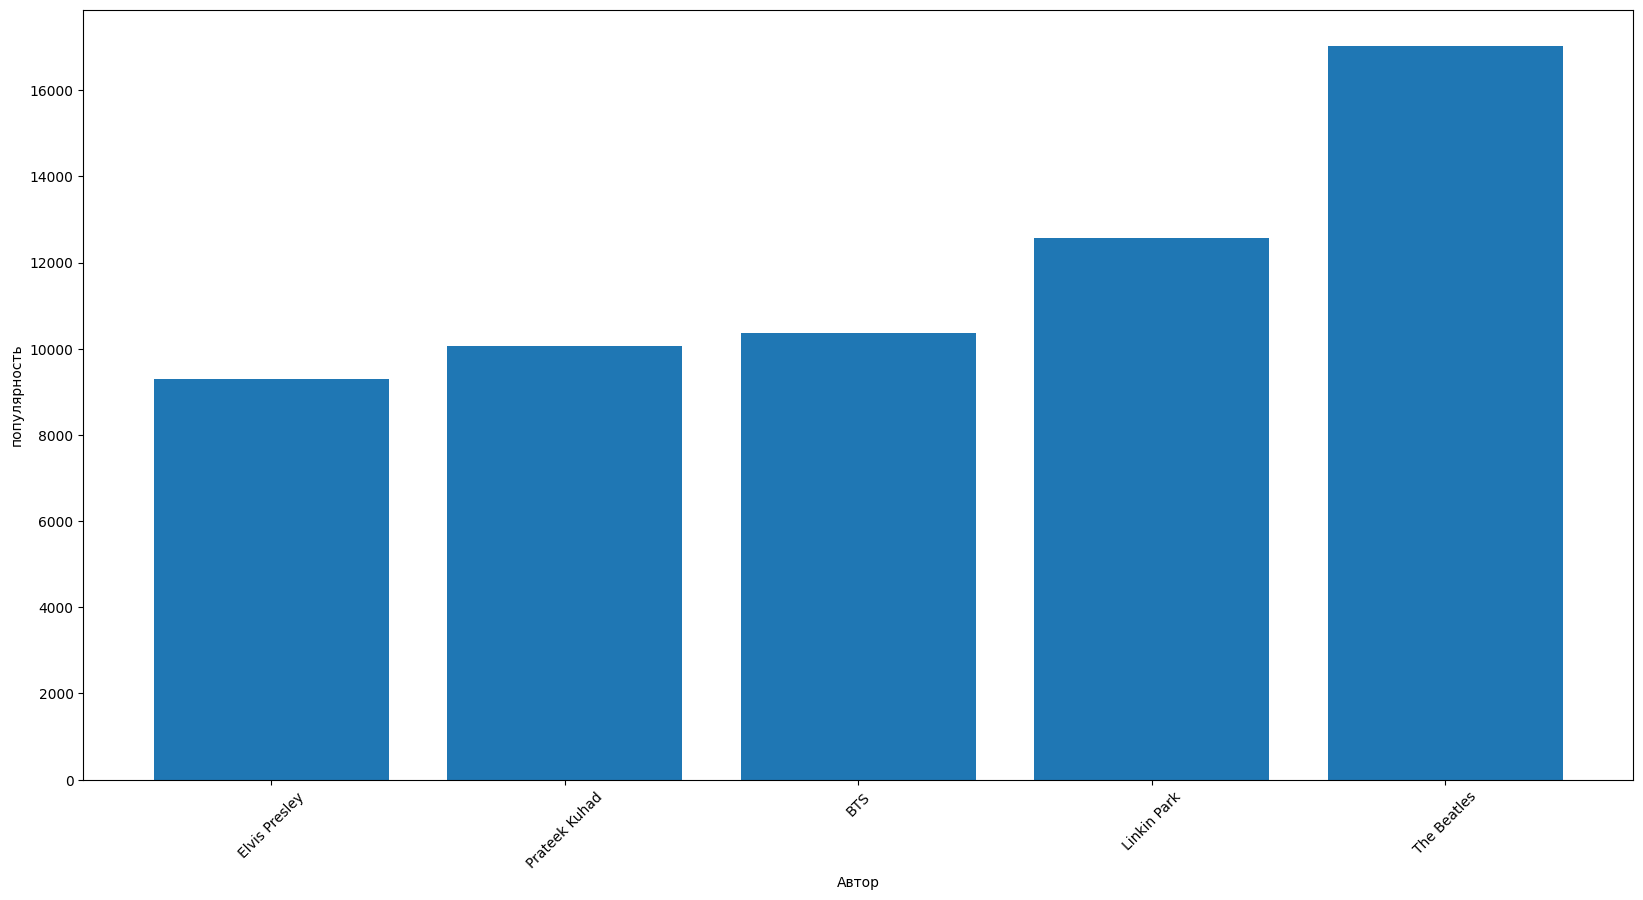

In [129]:
popartist =df1.groupby('artists')['popularity'].sum()
top5 = pd.DataFrame(popartist.sort_values().tail(5))

plt.figure(figsize=(20,10))
plt.bar(list(top5.index), list(top5.popularity))
plt.xlabel('Автор')
plt.ylabel('популярность')
plt.xticks(rotation=45)


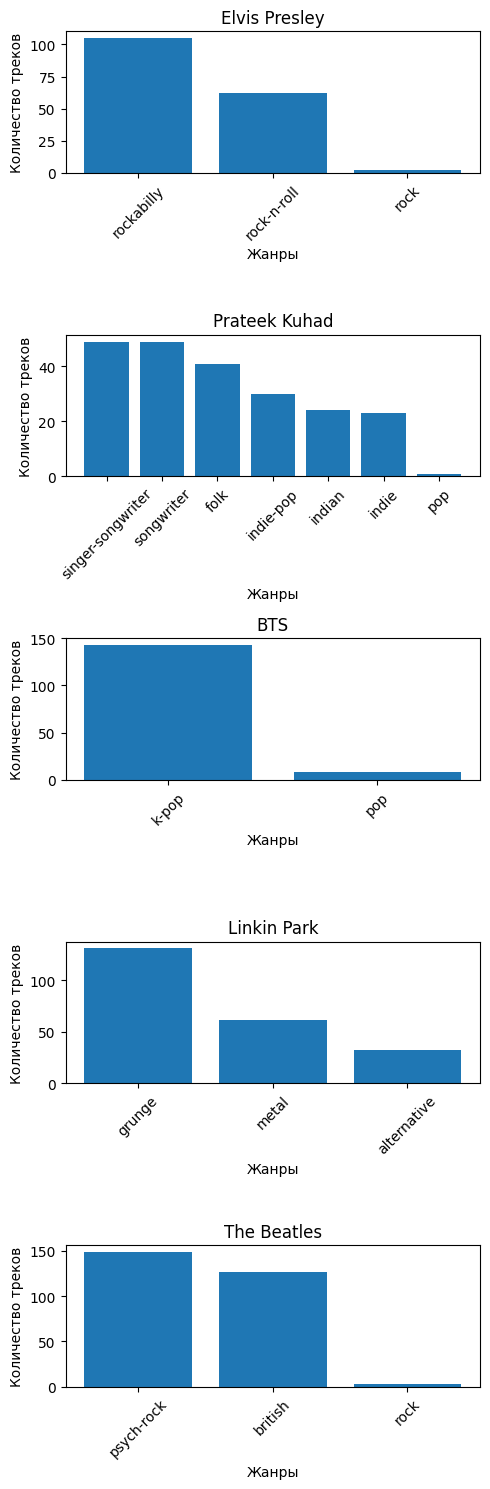

In [130]:
top5_names = list(top5.index)
populargenrestop5 = []

for name in top5_names:
    populargenrestop5.append(df1[df1['artists'] == f'{name}']['track_genre'].value_counts())

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 15))
axes = axes.flatten()

for i, name in enumerate(top5_names):
    artist_df = df1[df1['artists'] == name]
    genre_counts = artist_df['track_genre'].value_counts()

    top_genre_index = genre_counts.idxmax()

    axes[i].bar(genre_counts.index, genre_counts.values)
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Жанры')
    axes[i].set_ylabel('Количество треков')
    axes[i].tick_params(axis='x', rotation=45) 
plt.tight_layout()
plt.show()

Мы отследили в каком жанре песни имеют большую популярность у определённых авторов.

In [131]:
max1 = df1['tempo'].max()
df['tempo'] =df1['tempo'] / max1

max2 =df1['popularity'].max()
df['popularity'] =df1['popularity'] / max2
df

,artists,album_name,track_name,popularity,Time,explicit,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy2
0,10357,8100,11741,0.73,3.8,0,0.676,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.361245,4,0,-3.109906
1,3287,14796,22528,0.55,2.5,0,0.420,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.318397,4,0,-2.861010
2,12397,39162,60774,0.57,3.5,0,0.438,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.313643,4,0,-3.494506
3,14839,8580,9580,0.71,3.4,0,0.266,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.746758,3,0,-1.103494
4,5255,16899,25689,0.82,3.3,0,0.618,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.492863,4,0,-4.288683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,0.21,6.4,0,0.172,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.517705,5,113,-3.852355
113996,22486,66,65090,0.22,6.4,0,0.174,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.350242,4,113,-2.143206
113997,4952,5028,38207,0.22,4.5,0,0.629,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.543933,4,113,-3.584455
113998,18534,7238,21507,0.41,4.7,0,0.587,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.558651,4,113,-5.509834


**Конец Feature Engineering и выбор модели**

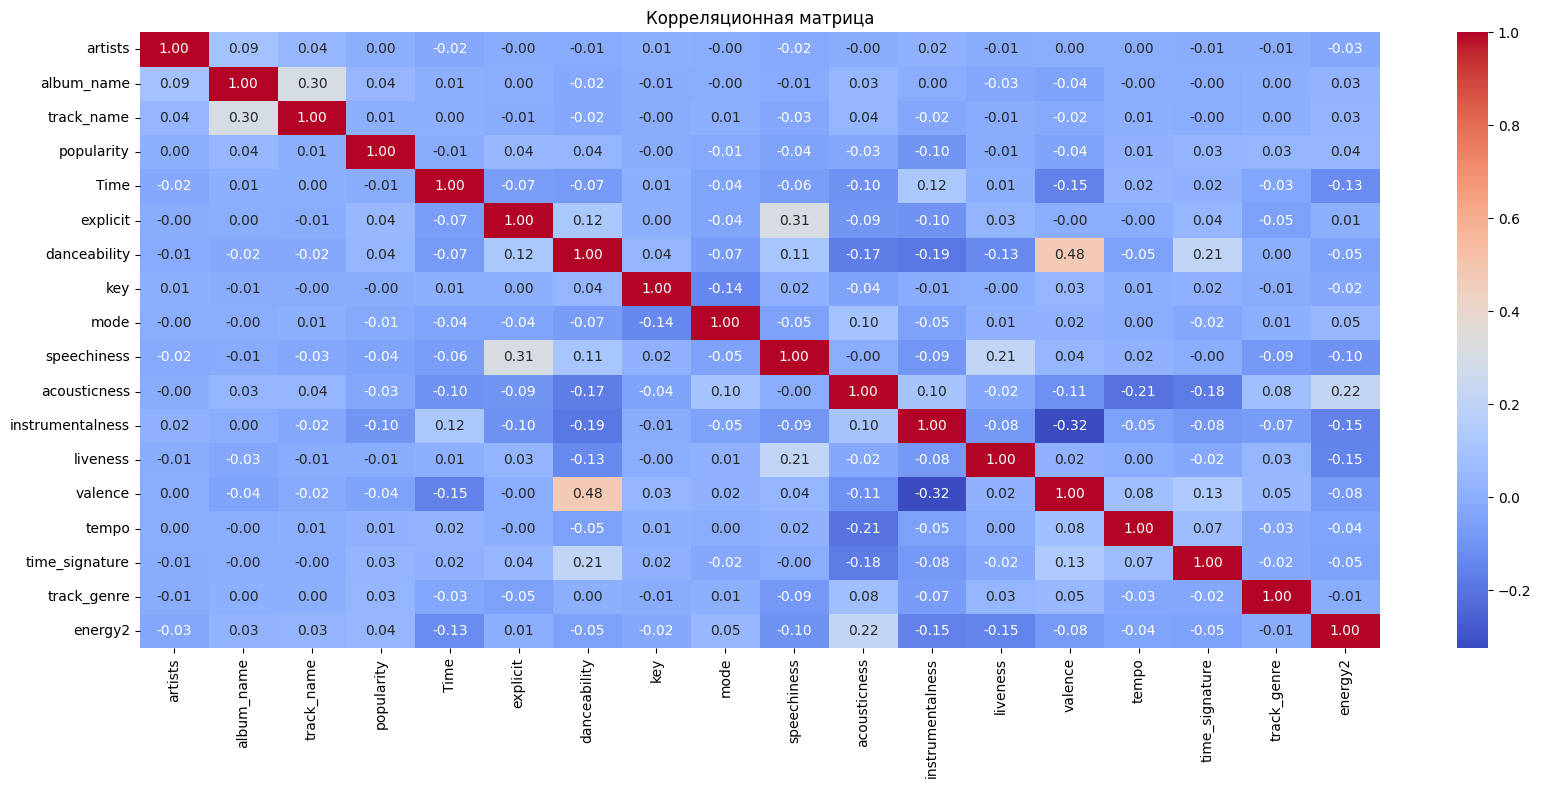

In [133]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [134]:
from sklearn.model_selection import train_test_split

X = df.drop(['popularity'], axis=1)
y = df['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

* Random Forest
* RegressorGradientBoosting
* RegressorLinearRegression
* Своя нейронная сеть

**Random Forest**
1. n_estimators: Количество деревьев: 200;
2. criterion: Критерий качества: среднеквадратичная ошибка (squared_error);
3. max_depth: Максимальная глубина дерева: 20;
4. min_samples_split: Мин. кол-во образцов для разделения узла: 15;
5. min_samples_leaf: Мин. кол-во образцов в листе: 10;

1 и 3 параметр должен быть большой, так как модель должна обучиться.

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regrfr = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=20, min_samples_split=15, min_samples_leaf=10, random_state=0)
regrfr.fit(x_train, y_train)
score_rfr = regrfr.score(x_test, y_test)
print(f'{score_rfr} - R2 score')

0.46422922998957605 - R2 score


график важности признаков

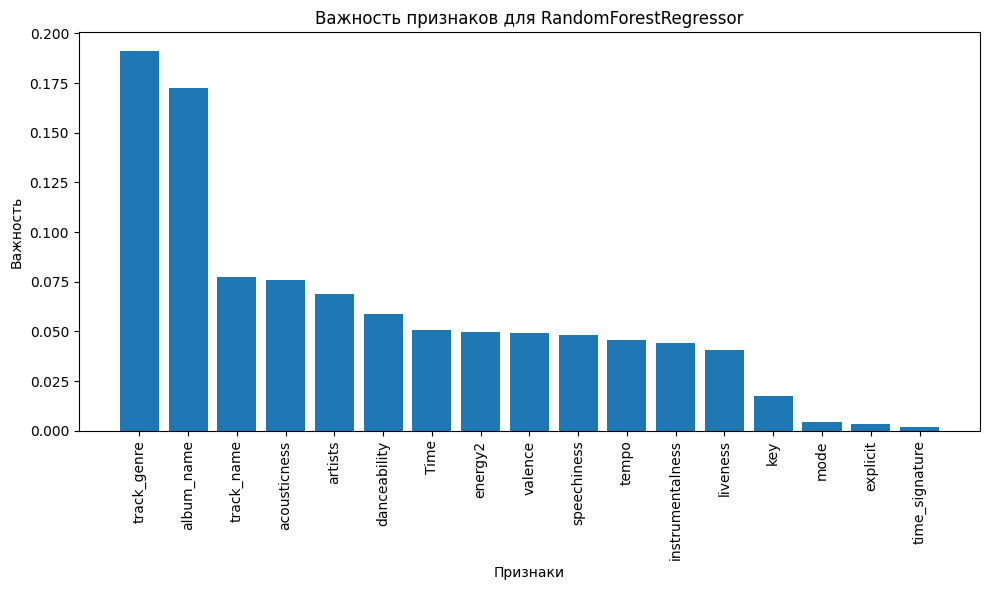

In [144]:
feature_importances = regrfr.feature_importances_
feature_names = x_train.columns

# Сортировка значений важности признаков по убыванию
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.title("Важность признаков для RandomForestRegressor")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

***GradientBoostingRegressor***
1. n_estimators: Количество деревьев: 200;
2. learning_rate: Скорость обучения: 0.1;
3. max_depth: Максимальная глубина дерева: 15 ;
4. min_samples_split: Мин. кол-во образцов для разделения узла: 15 ;
5. min_samples_leaf: Мин. кол-во образцов в листе: 10;
6. random_state: Seed для воспроизводимости результатов: 0;

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
reggbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=15, min_samples_split=15, min_samples_leaf=10, random_state=0)
reggbr.fit(x_train, y_train)
score_gbr = reggbr.score(x_test, y_test)
print(f'{score_gbr} - R2 score')

0.6932061736112723 - R2 score


график важности признаков

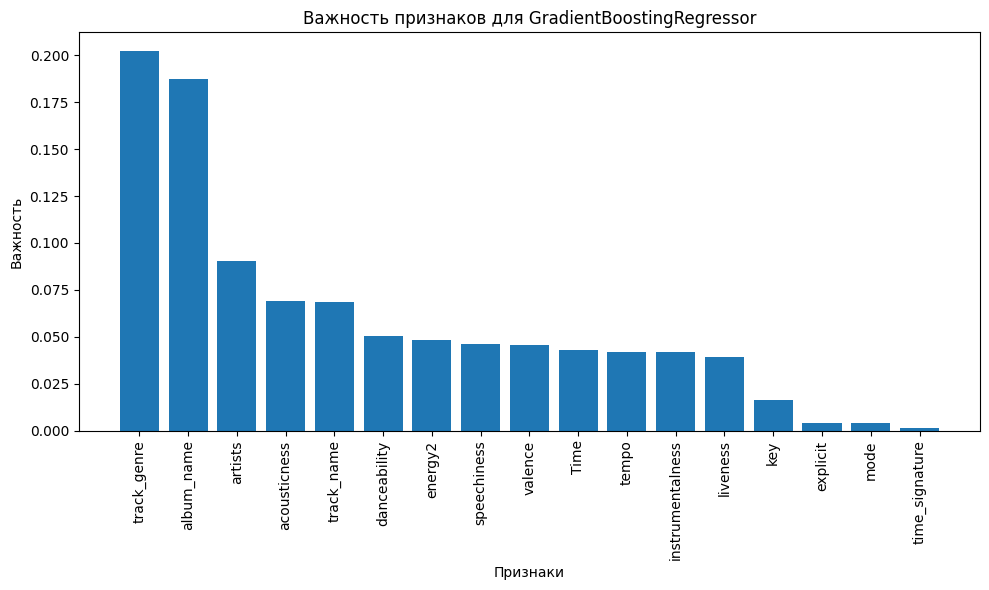

In [146]:
feature_importances = reggbr.feature_importances_
feature_names = x_train.columns
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.title("Важность признаков для GradientBoostingRegressor")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

***LinearRegression***

In [148]:
from sklearn.linear_model import LinearRegression
reglr = LinearRegression().fit(x_train, y_train)
score_lr = reglr.score(x_test, y_test)
print(f'{score_lr} - R2 score')

0.029999763747308505 - R2 score


Пока что это худший результат

***Своя нейронная сеть***

In [150]:
from keras.models import Sequential
import tensorflow.keras.backend as K
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[r2_score])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, r2_score = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test R-squared: {r2_score:.2f}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2405/2405 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.5691 - r2_score: -10.2271 - val_loss: 0.0882 - val_r2_score: -0.0288
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0835 - r2_score: -0.0364 - val_loss: 0.0655 - val_r2_score: -0.0275
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0614 - r2_score: -0.0320 - val_loss: 0.0516 - val_r2_score: -0.0155
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0507 - r2_score: -0.0119 - val_loss: 0.0496 - val_r2_score: -0.0139
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0491 - r2_score: -0.0110 - val_loss: 0.0489 - val_r2_score: -9.3417e-04
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0487 - r2_score: -0.0042 - val_loss: 0.0488 - val_r2_score: -0.0022
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0488 - r2_score: -2.6226e-04 - val_loss: 0.0484 - val_r2_score: 0.0042
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0485 - r

Очень странно но значение r2_score получается отрицательным. Что явно ненормально. Попробуем немного подругому.

In [152]:
from keras.models import Sequential
import tensorflow.keras.backend as K
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[r2_score])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
          callbacks=[early_stopping])

loss, r2_score = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test R-squared: {r2_score:.2f}')

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2405/2405 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.1808 - r2_score: -1.0207 - val_loss: 0.1248 - val_r2_score: -1.3684
Epoch 2/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0606 - r2_score: -0.0781 - val_loss: 0.0649 - val_r2_score: -0.2969
Epoch 3/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0539 - r2_score: -0.0493 - val_loss: 0.0560 - val_r2_score: -0.1270
Epoch 4/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0528 - r2_score: -0.0462 - val_loss: 0.0673 - val_r2_score: -0.3576
Epoch 5/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0516 - r2_score: -0.0310 - val_loss: 0.0548 - val_r2_score: -0.1116
Epoch 6/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0513 - r2_score: -0.0356 - val_loss: 0.0516 - val_r2_score: -0.0602
Epoch 7/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0506 - r2_score: -0.0414 - val_loss: 0.0499 - val_r2_score: -0.0328
Epoch 8/100
2405/2405 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0504 - r2_score:

Изменения не привели к улучшению результата. Поэтому оставим этот вариант как неудачный.

Вычислим метрики для Лучшей модели.(GradientBoostingRegressor)

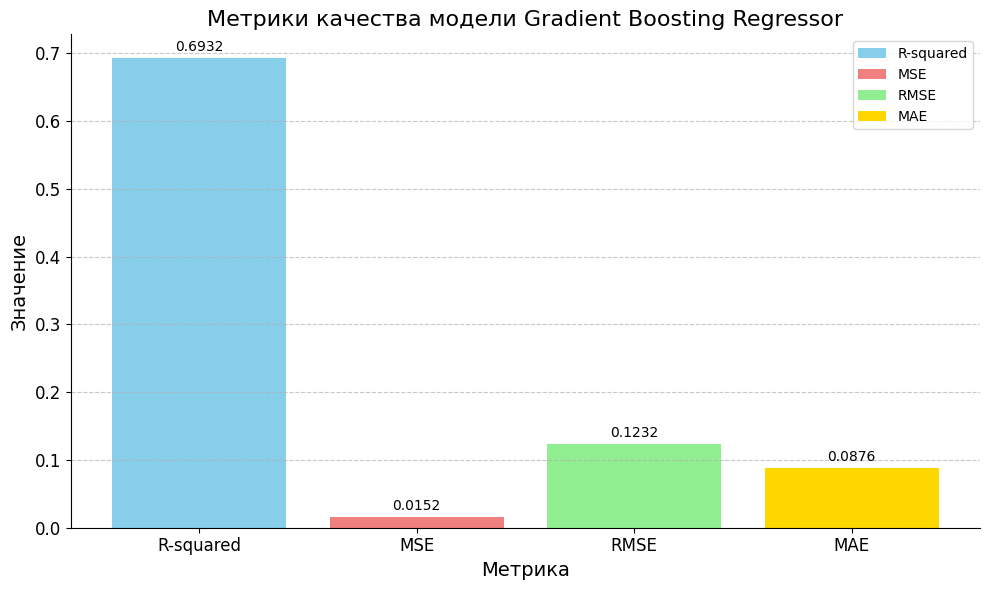

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = reggbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = reggbr.score(x_test, y_test) 

metrics = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

ax.bar_label(bars, fmt='%.4f', padding=3)

ax.set_title('Метрики качества модели Gradient Boosting Regressor', fontsize=16)
ax.set_xlabel('Метрика', fontsize=14)
ax.set_ylabel('Значение', fontsize=14)

ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(handles=bars, labels=metrics.keys())

plt.tight_layout()
plt.show()

Сделаем кроссвалидацию

In [157]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

reggbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=15, min_samples_split=15, min_samples_leaf=10, random_state=0)
kf = KFold(n_splits=5)
for fold_number, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = df['popularity'].iloc[train_index], df['popularity'].iloc[test_index]
    reggbr.fit(X_train, y_train)
    
    y_pred = reggbr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = reggbr.score(X_test, y_test)
    
    print(f"Номер обхода: {fold_number}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

Номер обхода: 1
MSE: 0.04
MAE: 0.16
RMSE: 0.19
R-squared: 0.26
Номер обхода: 2
MSE: 0.03
MAE: 0.15
RMSE: 0.18
R-squared: 0.26
Номер обхода: 3
MSE: 0.05
MAE: 0.20
RMSE: 0.23
R-squared: 0.02
Номер обхода: 4
MSE: 0.05
MAE: 0.18
RMSE: 0.22
R-squared: 0.04
Номер обхода: 5
MSE: 0.04
MAE: 0.15
RMSE: 0.19
R-squared: 0.15


In [ ]:
import matplotlib.pyplot as plt


iteration = [1, 2, 3, 4, 5]
mse = [0.04, 0.03, 0.05, 0.05, 0.04]
mae = [0.16, 0.15, 0.20, 0.18, 0.15]
rmse = [0.19, 0.18, 0.23, 0.22, 0.19]
r2 = [0.26, 0.26, 0.02, 0.04, 0.15]

plt.figure(figsize=(10, 6)) 

plt.plot(iteration, mse, marker='o', linestyle='-', label='MSE', color='blue')
plt.plot(iteration, mae, marker='@', linestyle='-', label='MAE', color='red')
plt.plot(iteration, rmse, marker='*', linestyle='-', label='RMSE', color='green')
plt.plot(iteration, r2, marker='x', linestyle='-', label='R-squared', color='gold')


plt.title('Изменение метрик качества модели по обходам', fontsize=16)
plt.xlabel('Номер обхода', fontsize=16)
plt.ylabel('Значение метрики', fontsize=16)

plt.legend(fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

**Вывод**

В ходе выполнения данной работы был проанализирован имеющийся датасет из 114000 строк, построены графики, которые показывают зависимости тех или иных параметров, а также были добавлены новые.Для предсказания переменной - popularity, я обучил 4 модели - RandomForestRegressor, GradientBoostingRegressor, LinearRegression и нейронную сеть.  Лучшей оказаль GradientBoostingRegressor, показавшая наибольший R-squared.